# 2.  Language Model 

In [1]:
import random 

In [2]:
filename = 'movie_comments.txt'

In [3]:
import pandas as pd 
content=pd.read_csv(filename, encoding='utf-8')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
content.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [5]:
articles = content['comment'].tolist()

In [6]:
articles[23]

'片头海里那场动作戏看完就呆不下去了，太假太做作，提前离场。'

The function token joined all articles 

In [7]:
len(articles)

import re 
def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string)
articles_clean = [''.join(token(str(a)))for a in articles]

In [8]:
articles_clean[1:20]

['首映礼看的太恐怖了这个电影不讲道理的完全就是吴京在实现他这个小粉红的英雄梦各种装备轮番上场视物理逻辑于不顾不得不说有钱真好随意胡闹',
 '吴京的炒作水平不输冯小刚但小刚至少不会用主旋律来炒作吴京让人看了不舒服为了主旋律而主旋律为了煽情而煽情让人觉得他是个大做作大谎言家729更新片子整体不如湄公河行动1整体不够流畅编剧有毒台词尴尬2刻意做作的主旋律煽情显得如此不合时宜而又多余',
 '凭良心说好看到不像战狼1的续集完虐湄公河行动',
 '中二得很',
 '犯我中华者虽远必诛吴京比这句话还要意淫一百倍',
 '脑子是个好东西希望编剧们都能有',
 '三星半实打实的7分第一集在爱国主旋律内部做着各种置换与较劲但第二集才真正显露吴京的野心他终于抛弃李忠志了新增外来班底让硬件实力有机会和国际接轨开篇水下长镜头和诸如铁丝网拦截RPG弹头的细节设计都让国产动作片重新封顶在理念上它甚至做到绣春刀2最想做到的那部分',
 '开篇长镜头惊险大气引人入胜结合了水平不俗的快剪下实打实的真刀真枪让人不禁热血沸腾特别弹簧床架挡炸弹空手接碎玻璃弹匣割喉等帅得飞起就算前半段铺垫节奏散漫主角光环开太大等也不怕作为一个中国人两个小时弥漫着中国强大得不可侵犯的氛围还是让那颗民族自豪心砰砰砰跳个不停',
 '15100吴京的冷峰在这部里即像成龙又像杰森斯坦森但体制外的同类型电影主角总是代表个人无能的政府需要求助于这些英雄才能解决难题体现的是个人的价值所以主旋律照抄这种模式实际上是有问题的我们以前嘲笑个人英雄主义却没想到捆绑爱国主义的全能战士更加难以下咽',
 '犯我中华者虽远必诛是有多无脑才信这句话',
 '这部戏让人看的热血沸腾对吴京路转粉最后的彩蛋让我们没有理由不期待下一部',
 '假嗨特别恶心的电影',
 '有几处情节设置过于尴尬彰显国家自豪感的部分稍显突兀',
 '就是一部爽片打戏挺燃但是故事一般达康书记不合适这个角色赵东来倒是很合适张瀚太太太违和了分分钟穿越回偶像剧',
 '赵东来达康书记我们接到在非洲卧底的冷锋报告丁义珍现在非洲我们请求抓捕李达康东来这件事先不要声张特别是别让省厅知道就你和我一起去非洲加上冷锋同志三人逮捕丁义珍这次行就叫战狼2吧',
 '下一部拍喜剧吧整个片子真感觉挺搞笑的',
 '战狼2里吴京这么能打他打得过徐晓冬么',
 '心往一处想劲往一处使就能实现我们的梦想看吧比

In [9]:
len(articles_clean)

with open('article_261497.txt', 'w',encoding="utf-8") as f:
    for a in articles_clean:
        f.write(a + '\n')


In [10]:
articles_clean[1]

'首映礼看的太恐怖了这个电影不讲道理的完全就是吴京在实现他这个小粉红的英雄梦各种装备轮番上场视物理逻辑于不顾不得不说有钱真好随意胡闹'

In [11]:
import re 
def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string)

In [12]:
from collections import Counter 

In [13]:
import jieba
def cut(string): return list(jieba.cut(string))

In [14]:
TOKEN = []

In [15]:
for i, line in enumerate((open('article_261497.txt',encoding="utf-8"))): 
    # replace 10000 with a big number when you do your homework. 
    #if i > 10000: break    
    TOKEN += cut(line)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\herbi\AppData\Local\Temp\jieba.cache
Loading model cost 0.768 seconds.
Prefix dict has been built succesfully.


In [16]:
from functools import reduce

In [17]:
from operator import add, mul

In [18]:
words_count = Counter(TOKEN)

In [19]:
words_count.most_common(10)

[('的', 328262),
 ('\n', 261497),
 ('了', 102420),
 ('是', 73106),
 ('我', 50338),
 ('都', 36255),
 ('很', 34712),
 ('看', 34022),
 ('电影', 33675),
 ('也', 32065)]

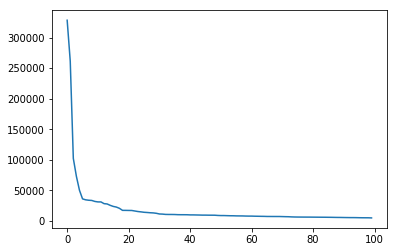

In [20]:
frequiences = [f for w, f in words_count.most_common(100)]

x = [i for i in range(100)]
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, frequiences)

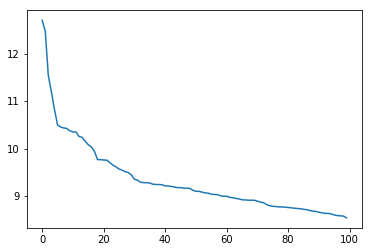

In [21]:
import numpy as np
plt.plot(x, np.log(frequiences))

In [22]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [23]:
#prob_1('我们')
prob_1('恶心')

0.00019550444988330763

In [24]:
TOKEN[10:20]

['想', '吐', '\n', '首映礼', '看', '的', '太', '恐怖', '了', '这个']

In [25]:
TOKEN = [str(t) for t in TOKEN]

In [26]:
len(TOKEN)

4751810

In [27]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [28]:
TOKEN_2_GRAM[:10]

['吴京意淫', '意淫到', '到了', '了脑残', '脑残的', '的地步', '地步看', '看了', '了恶心', '恶心想']

In [29]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [30]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [31]:
prob_2('我们', '在')

2.0202836478241545e-05

In [32]:
prob_2('吴京', '意淫')

6.313386399450483e-07

In [33]:
def get_probability(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    
    return sentence_pro

In [34]:
get_probability('小明今天抽奖抽到一台苹果手机')

4.343268699453012e-40

# 3. 获得最优质的的语言  
当我们能够生成随机的语言并且能判断之后，我们就可以生成更加合理的语言了。请定义 generate_best 函数，该函数输入一个语法 + 语言模型，能够生成n个句子，并能选择一个最合理的句子:

提示，要实现这个函数，你需要Python的sorted函数

In [35]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split): # each line , use line seperator 
        if not line.strip(): continue
        exp, stmt = line.split(split) 
        # within statement , stmt seperator . Also, this way it automatically give value to experession and stmt 
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
        # then notice that the statment is split by "|"
    return grammar

In [36]:
choice = random.choice
def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression
    expaned = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

In [37]:
westworld = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [38]:
role='human'
print(generate(gram=create_grammar(westworld, split='='), target=role))

俺找找乐子


In [39]:
def generate_n(n, role):
    return [generate(gram=create_grammar(westworld, split='='), target=role) for t in range(n)]

In [93]:
def generate_best_of_n(n,role):
    temp=generate_n(n,role)
    temp_results=[]
    for i in range(len(temp)):
        temp_results+=[tuple((temp[i],get_probability(temp[i])))]
    return sorted(temp_results, key= lambda x: x[1])
    

In [95]:
generate_best_of_n(5,'human')

[('我找找玩的', 1.1944879011039273e-22),
 ('我们找找乐子', 1.3048223366365174e-19),
 ('俺找找乐子', 1.3048223366365174e-19),
 ('我找找乐子', 3.262055841591293e-18),
 ('我找找乐子', 3.262055841591293e-18)]

## note: sorted() is sorting on list of tuples. 
To generate list of tuples, use tuple() function and + operator 

## Additional Pattern Recognition

Pattern: (我想要A)  
Response: (如果你有 A，对你意味着什么呢？)  


Input: (我想要度假)  
Response: (如果你有度假，对你意味着什么呢？)  
为了实现模板的判断和定义，我们需要定义一个特殊的符号类型，这个符号类型就叫做"variable"， 这个"variable"用来表示是一个占位符。例如，定义一个目标: "I want X"， 我们可以表示成 "I want ?X", 意思就是?X是一个用来占位的符号。

如果输入了"I want holiday"， 在这里 'holiday' 就是 '?X'

s.isalpha() 
isalpha() does not take any parameters
- Returns :
- 1.True- If all characters in the string are alphabet.
- 2.False- If the string contains 1 or more non-alphabets.

In [96]:
def is_variable(pat):
    return pat.startswith('?') and all(s.isalpha() for s in pat[1:])
def pat_match(pattern, saying):
    if is_variable(pattern[0]): return True
    else:
        if pattern[0] != saying[0]: return False
        else:
            return pat_match(pattern[1:], saying[1:])

In [104]:
pat='i want ?X'
all(s.isalpha() for s in pat[1:])

False

In [106]:
pat.startswith('?') and all(s.isalpha() for s in pat[1:])

False

In [97]:
def pat_match(pattern, saying):
    if is_variable(pattern[0]):
        return pattern[0], saying[0]
    else:
        if pattern[0] != saying[0]: return False
        else:
            return pat_match(pattern[1:], saying[1:])

In [114]:
pattern = 'I want ?X'.split()
saying = "I want holiday".split()

In [115]:
pat_match(pattern, saying)

[('?X', 'holiday')]

In [100]:
pat_match("?X equals ?X".split(), "2+2 equals 2+2".split())

('?X', '2+2')

In [101]:
def pat_match(pattern, saying):
    if not pattern or not saying: return []
    
    if is_variable(pattern[0]):
        return [(pattern[0], saying[0])] + pat_match(pattern[1:], saying[1:])
    else:
        if pattern[0] != saying[0]: return []
        else:
            return pat_match(pattern[1:], saying[1:])

In [102]:
pat_match("?X greater than ?Y".split(), "3 greater than 2".split())

[('?X', '3'), ('?Y', '2')]

In [103]:
def pat_to_dict(patterns):
    return {k: v for k, v in patterns}
def subsitite(rule, parsed_rules):
    if not rule: return []
    
    return [parsed_rules.get(rule[0], rule[0])] + subsitite(rule[1:], parsed_rules)